## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 5: Data Visualization 
#### Excercises

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact, widgets

# Excercise 1
In this exercise, we will be using Universities_imputed_reduced.csv. Draw the following described visualizations.

    a.	Use boxplots to compare the student to faculty ratio (stud./fac. ratio) for the two population public and private universities.
    b.	Use a histogram to compare the student to faculty ratio (stud./fac. ratio) for the two population public and private universities.
    c.	use subplots to put the results of a and b on top of one another to create a visual that compares the two populations even better. 


In [3]:
uni_df = pd.read_csv('Universities_imputed_reduced.csv')
uni_df.head()

,College Name,State,Public/Private,num_appli_rec,num_appl_accepted,num_new_stud_enrolled,in-state tuition,out-of-state tuition,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,Private,193,146,55,7560,7560,76,11.9,15
1,University of Alaska at Fairbanks,AK,Public,1852,1427,928,1742,5226,67,10.0,60
2,University of Alaska Southeast,AK,Public,146,117,89,1742,5226,39,9.5,39
3,University of Alaska at Anchorage,AK,Public,2065,1598,1162,1742,5226,48,13.7,60
4,Alabama Agri. & Mech. Univ.,AL,Public,2817,1920,984,1700,3400,53,14.3,40


a. 

<AxesSubplot: xlabel='stud./fac. ratio', ylabel='Public/Private'>

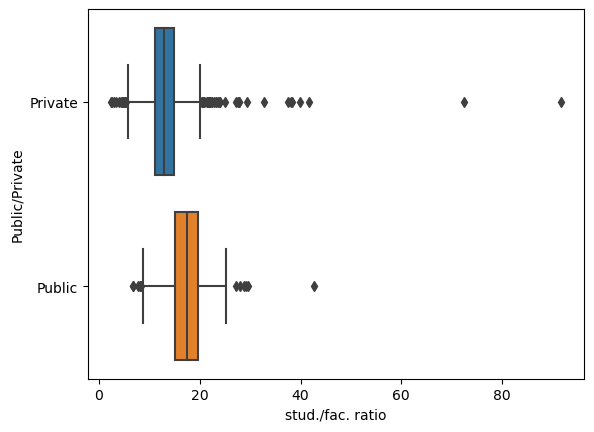

In [17]:
sns.boxplot(data =uni_df, x = "stud./fac. ratio", y = "Public/Private")

b. 

<AxesSubplot: xlabel='stud./fac. ratio', ylabel='Count'>

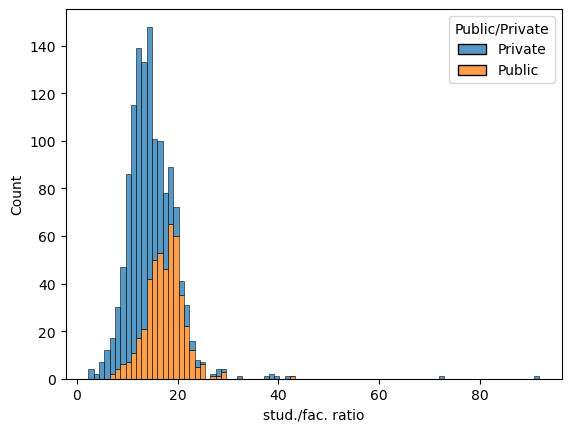

In [19]:
sns.histplot(data =uni_df, x = "stud./fac. ratio", hue = "Public/Private", multiple = "stack")

c. 

<AxesSubplot: xlabel='stud./fac. ratio', ylabel='Public/Private'>

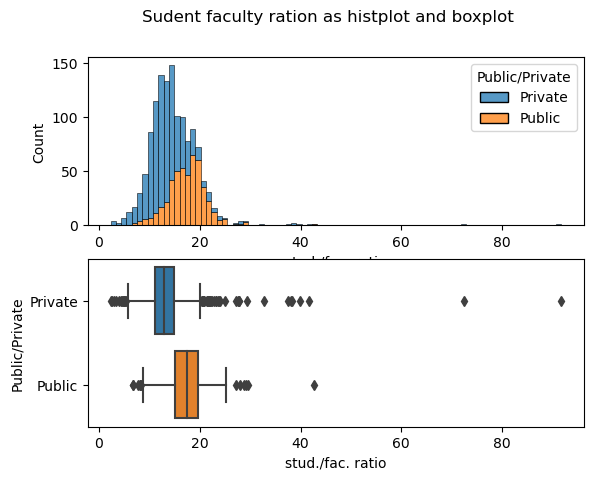

In [24]:
fig, axes = plt.subplots(2, 1)
fig.suptitle('Sudent faculty ration as histplot and boxplot')

sns.histplot(ax = axes[0],data =uni_df, x = "stud./fac. ratio", hue = "Public/Private", multiple = "stack")
sns.boxplot(ax = axes[1], data =uni_df, x = "stud./fac. ratio", y = "Public/Private")

# Excercise 2

In this exercise, we will continue using Universities_imputed_reduced.csv. Draw the following described visualizations.

    a.	Use a bar chart to compare the private/public ratio of all the states in the dataset. In this example, the populations we are comparing are the states. 
    b.	Improve the visualizations by sorting the states on the visuals based on the total number of universities they have.
    c.	Create a stacked bar chart that shows the compare the percentages of public and private schools across different states. 

a.

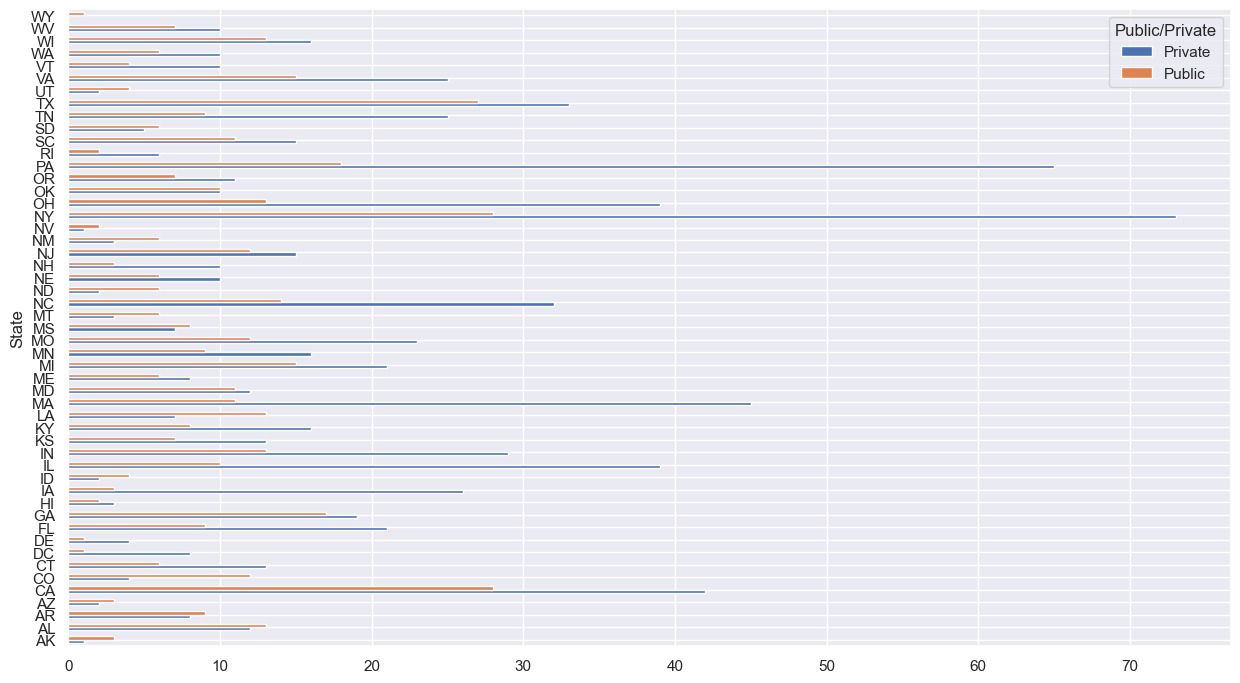

In [94]:
sns.set(rc={'figure.figsize':(15,8.27)})
uni_df = pd.read_csv('Universities_imputed_reduced.csv')
uni_df.groupby(["State", "Public/Private"]).size().unstack().plot.barh()
plt.show()

b.

<AxesSubplot: xlabel='State'>

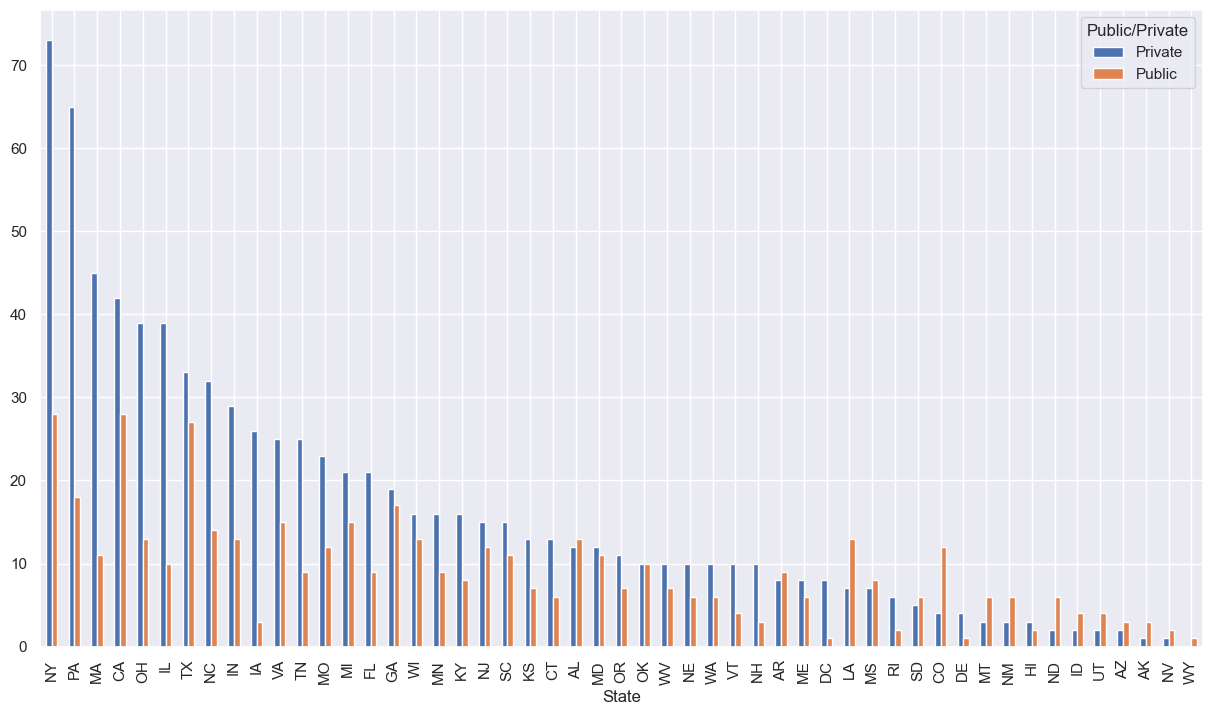

In [127]:
uni_df.groupby(["State", "Public/Private"]).size().unstack().sort_values(['Private','Public'], ascending=False).plot.bar()
#btw, this is 123 times cuz I was messing with stuff

c.

<AxesSubplot: xlabel='State'>

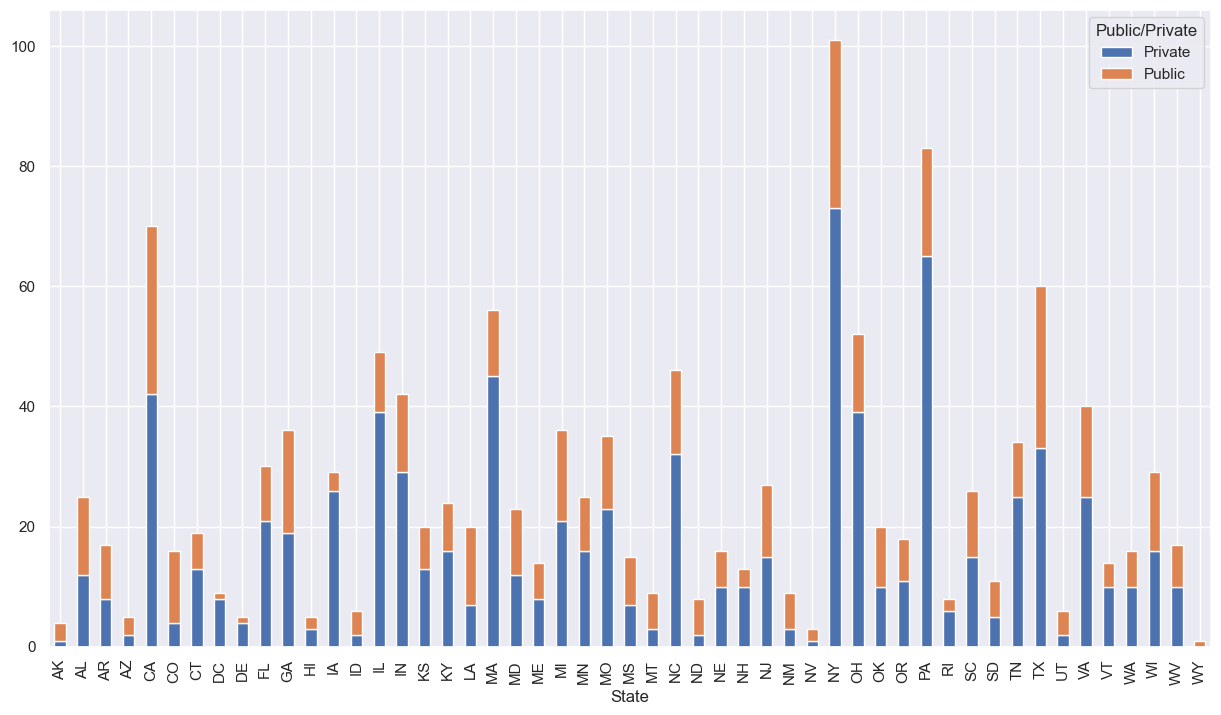

In [128]:
uni_df.groupby(["State", "Public/Private"]).size().unstack().plot.bar(stacked=True)

# Excercise 3

For this example, we will be using WH Report_preprocessed.csv. Draw the following described visualizations.

    a.	Create a visual that compares the relationship between all the happiness indices.
    b.	Use the visual you created in a) to report the happiness indices with strong relationships, and describe those relationships.
    c.	Confirm the relationship you found and described by calculating their correlation coefficients and adding these new pieces of information to your description to improve them. 


In [131]:
report_df = pd.read_csv('WH Report_preprocessed.csv')


a.

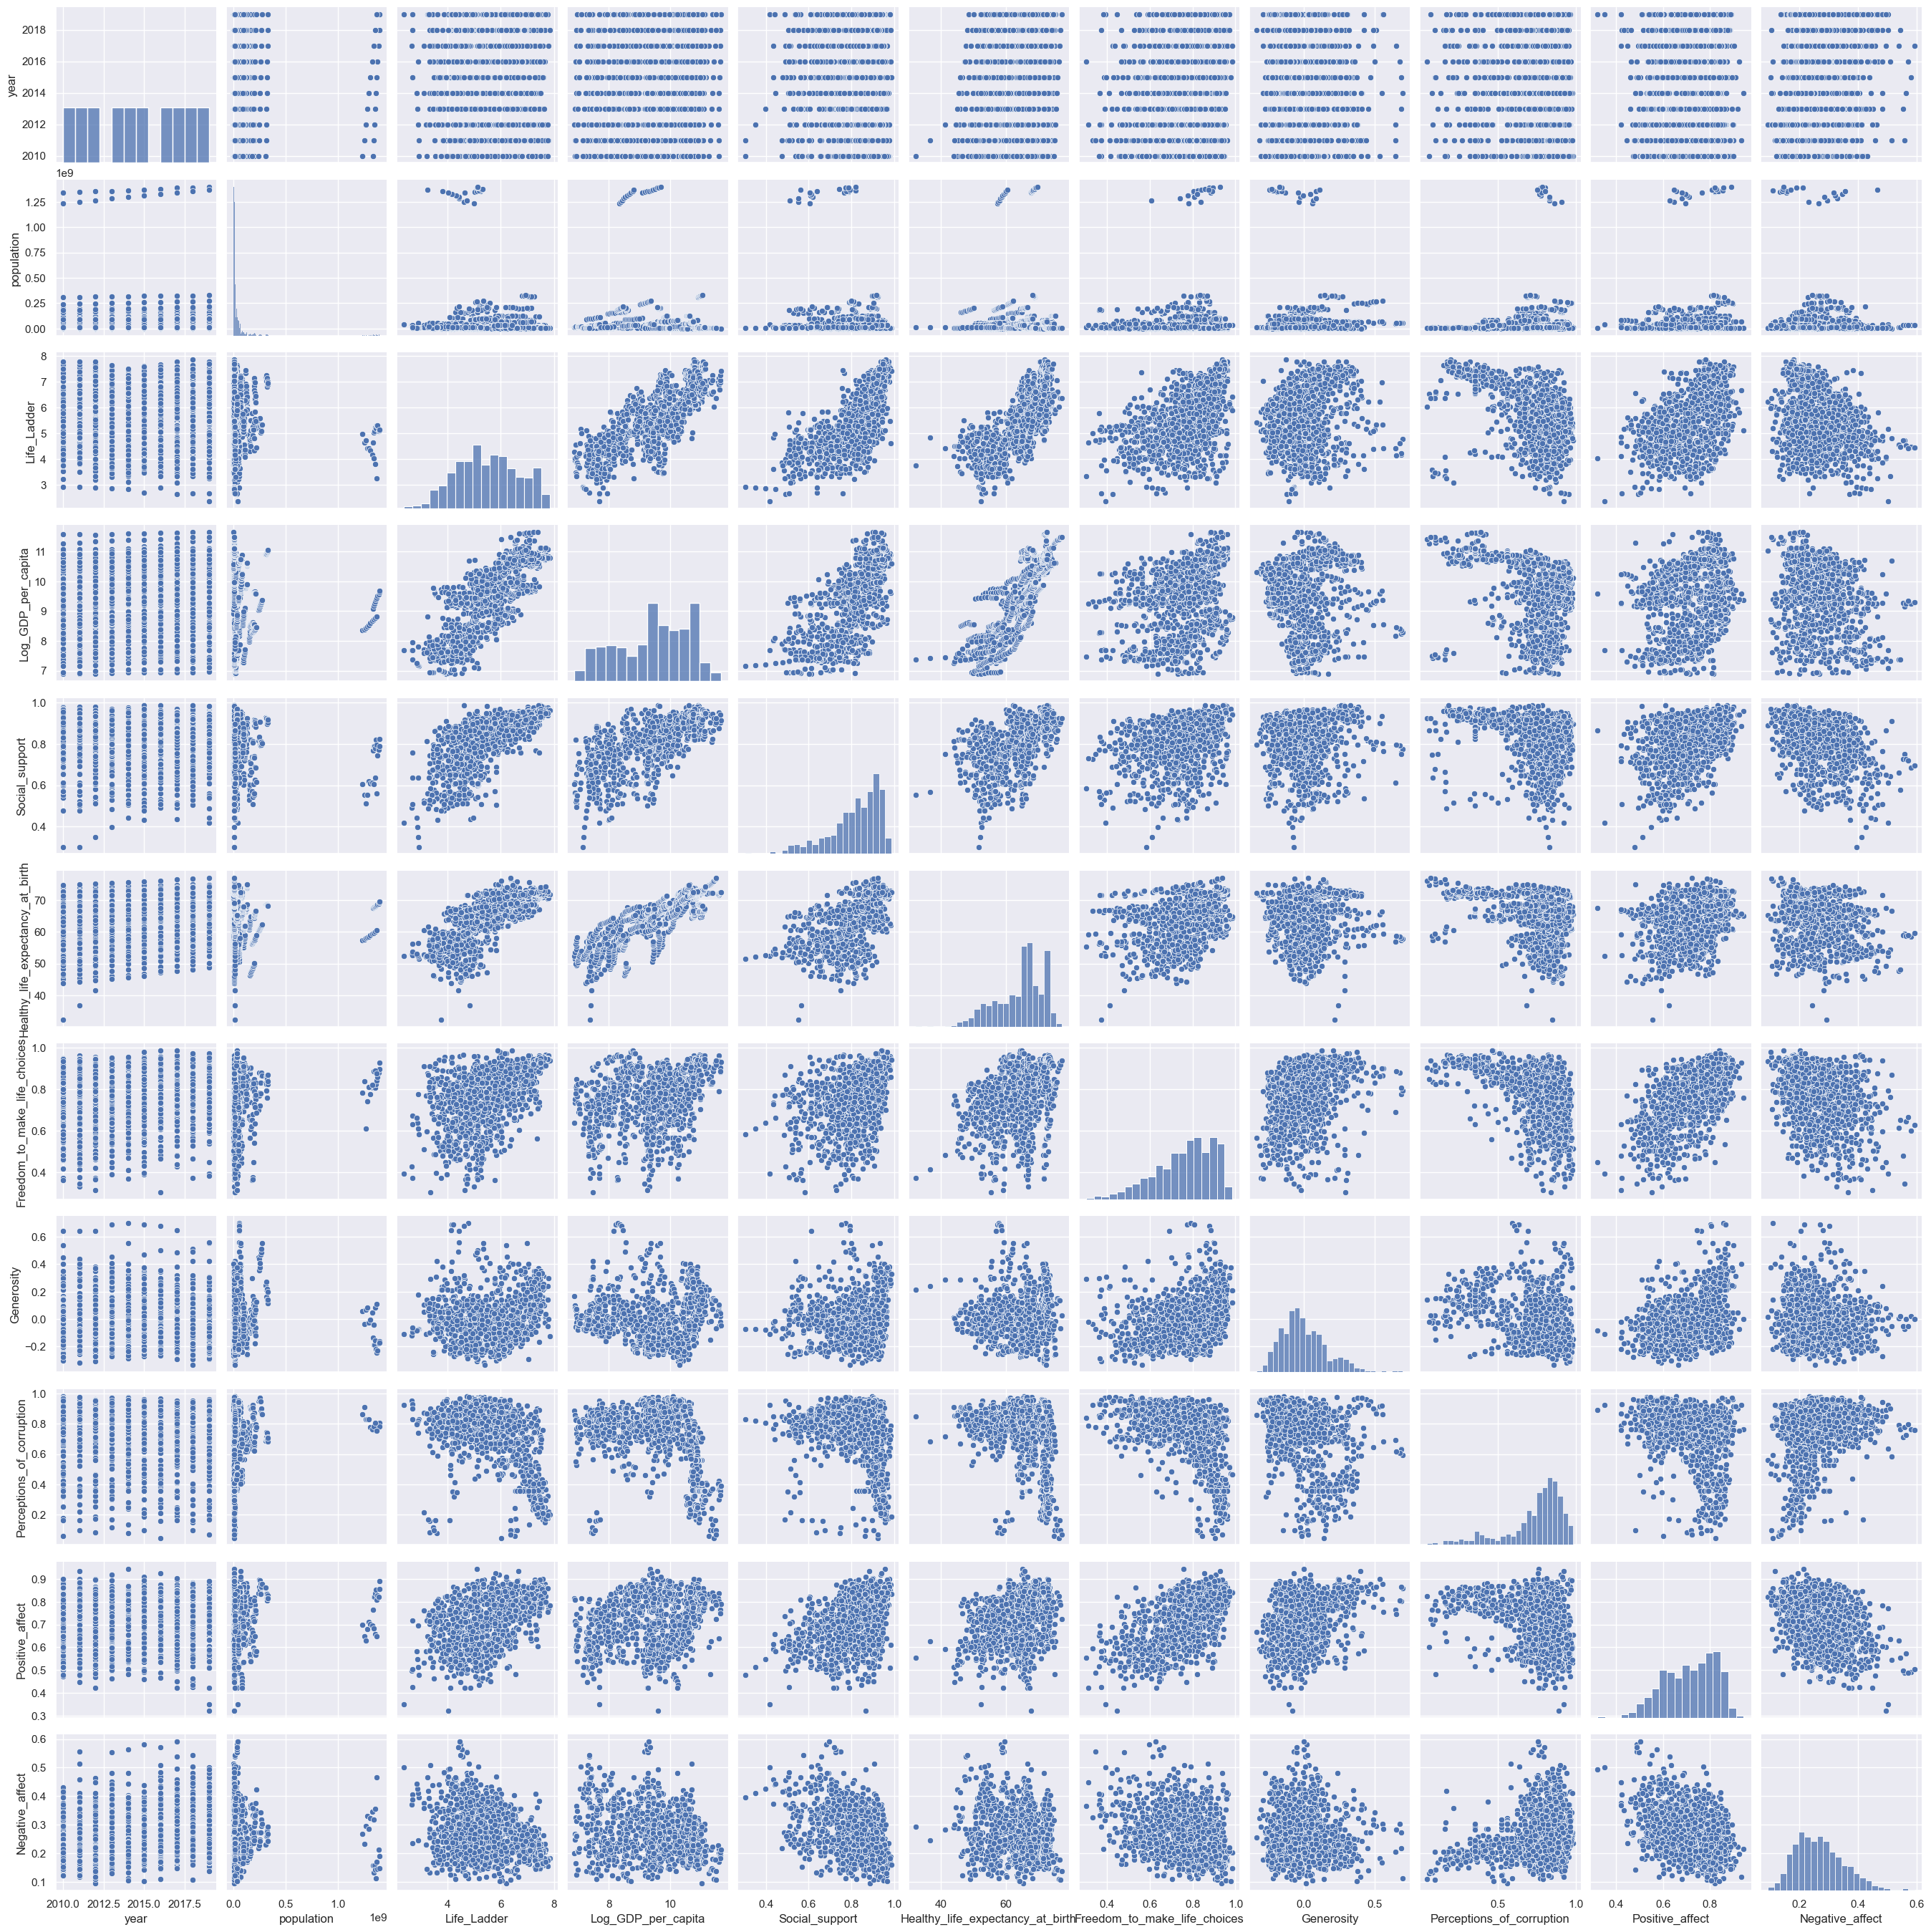

In [132]:
report_df.head()

sns.pairplot(report_df)

b. 

In [ ]:
# There is a strong positive relationship between healthy life expectancy at brith and GDP per capita. Also a strong positive relationship between GDP per capita and Social Support.
# These two really stick out. The Pearson's r coefficients calculated before confirm both these claims. 

c.

In [135]:
print(report_df['Log_GDP_per_capita'].corr(report_df['Healthy_life_expectancy_at_birth']))
report_df['Log_GDP_per_capita'].corr(report_df['Social_support'])

0.8579807467997659


0.7189690269727645

# Excercise 4

For this exercise, we will continue using WH Report_preprocessed.csv. Draw the following described visualizations.

    a.	Draw a visual that examine the relationship between the two attributes Continent and Generosity. 
    b.	Based on the visual, is there a relationship between the two attributes? Explain why.

a.

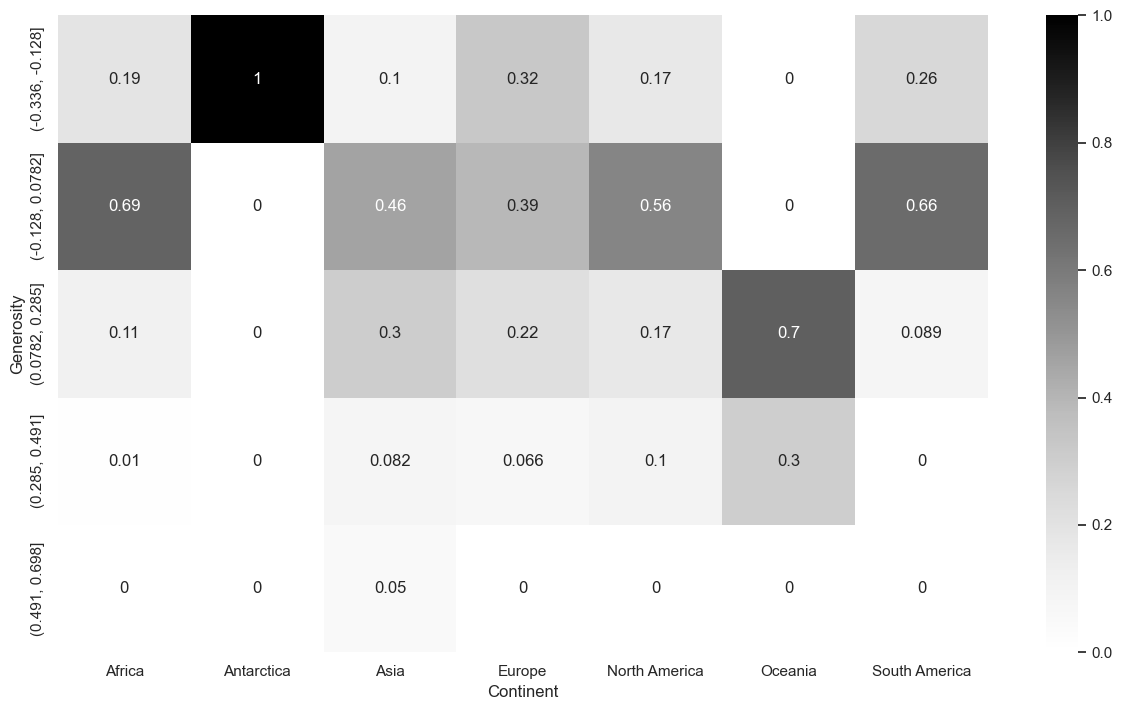

In [152]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
report_df.head()

gen_discretized = pd.cut(report_df.Generosity, bins = 5)
cont_table = pd.crosstab(gen_discretized, report_df.Continent)
prob_table = cont_table / cont_table.sum()

sns.heatmap(prob_table, annot=True, center=0.5 ,cmap="Greys")
plt.show()



b.

In [ ]:
# Besides the obvious antarctica value, there doesn't seem to be a relationship betweent these two values. Generosity accross continetns seems to stay within .285 and -.128

# Excercise 5

For this exercise, we will be using whickham.csv. Draw the following described visualizations.

    a.	What is the numerical attribute in this dataset? Draw two different plots that summarize the population of data objects for the numerical attribute.
    b.	What are the categorical attributes in this dataset? Draw a plot per attribute that summarizes the population of the data object for each attribute. 
    c.	 Draw a visual that examine the relationship between outcome and smoker. Do you notice anything surprising about this visualization?
    d.	To demystify the surprising relationship you observed on c) run the following code, and study the visual it creates.

``
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()
``

    e.	Using the visual that was created under d) explain the surprising observation under c).
    f.	How many dimensions the visual that was created under d) has? How did we manage to add dimensions to the bar chart?


In [154]:
person_df = pd.read_csv('whickham.csv')
person_df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


a.

<AxesSubplot: >

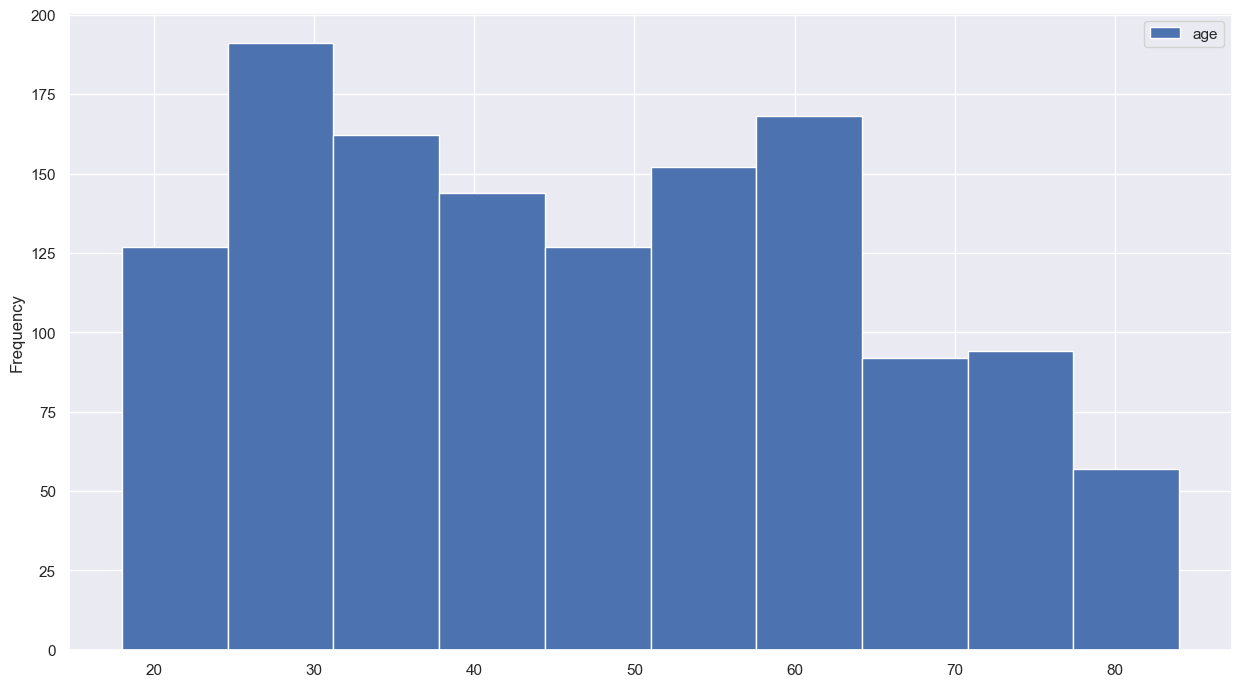

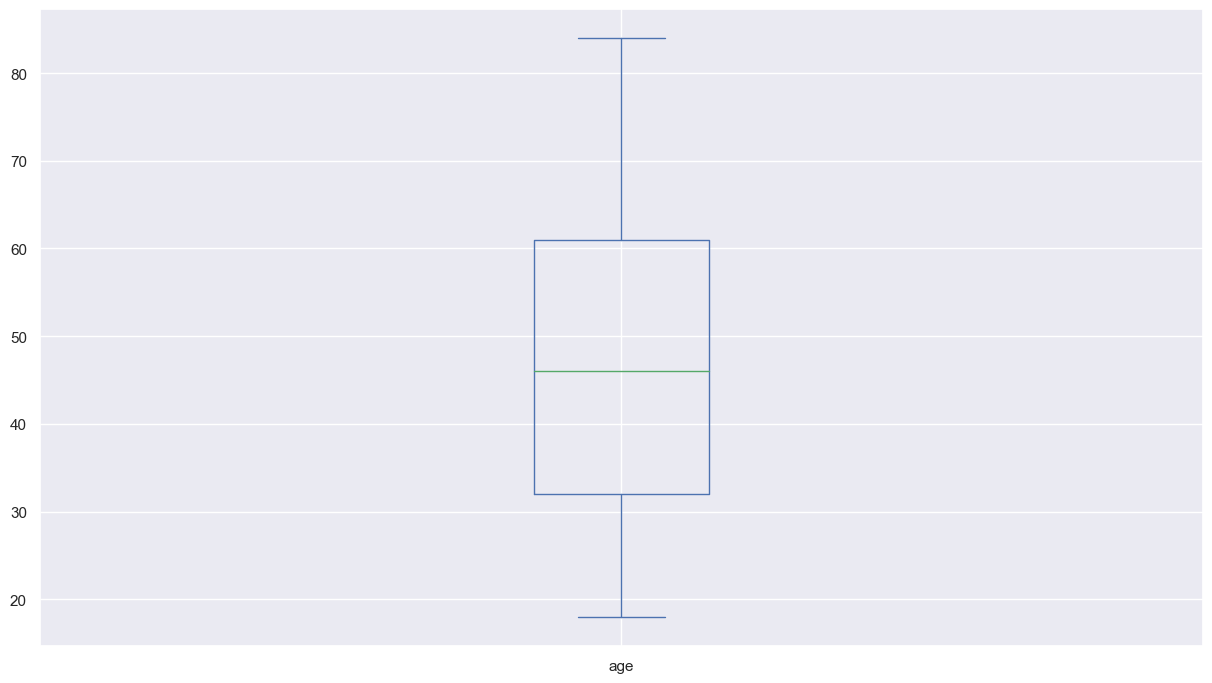

In [162]:
person_df.plot.hist(column = ["age"])
person_df.plot.box(column = ["age"])



b.

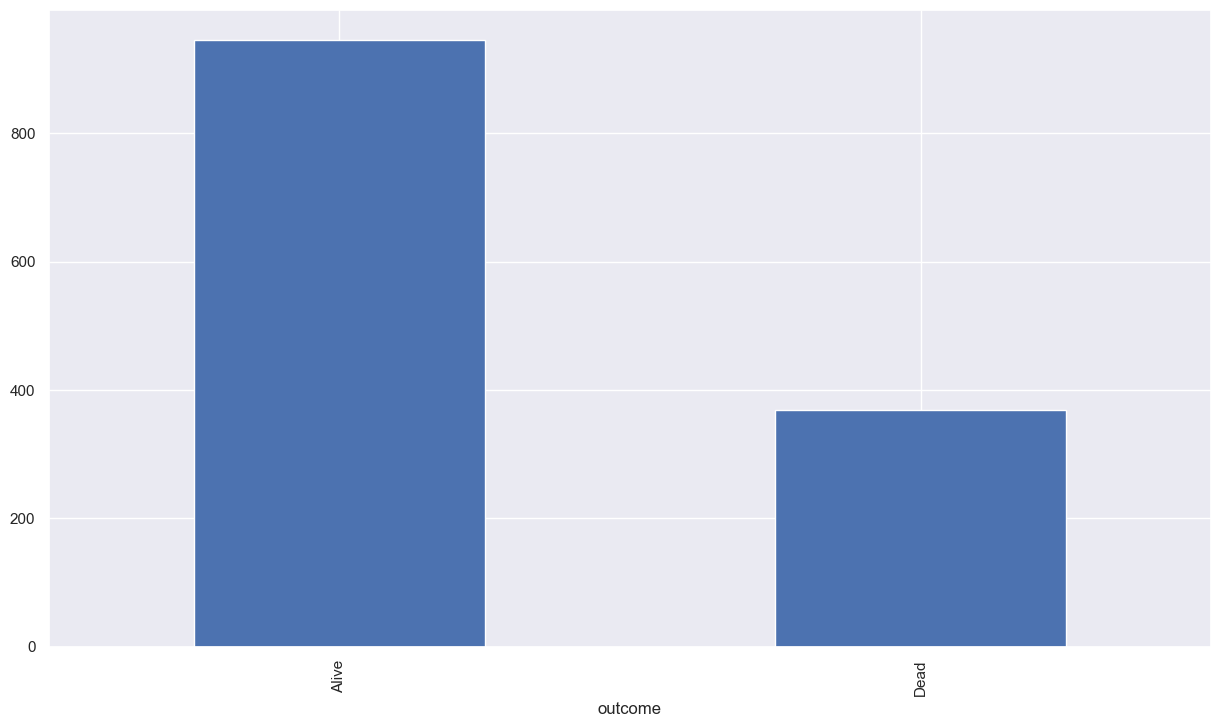

<AxesSubplot: xlabel='smoker'>

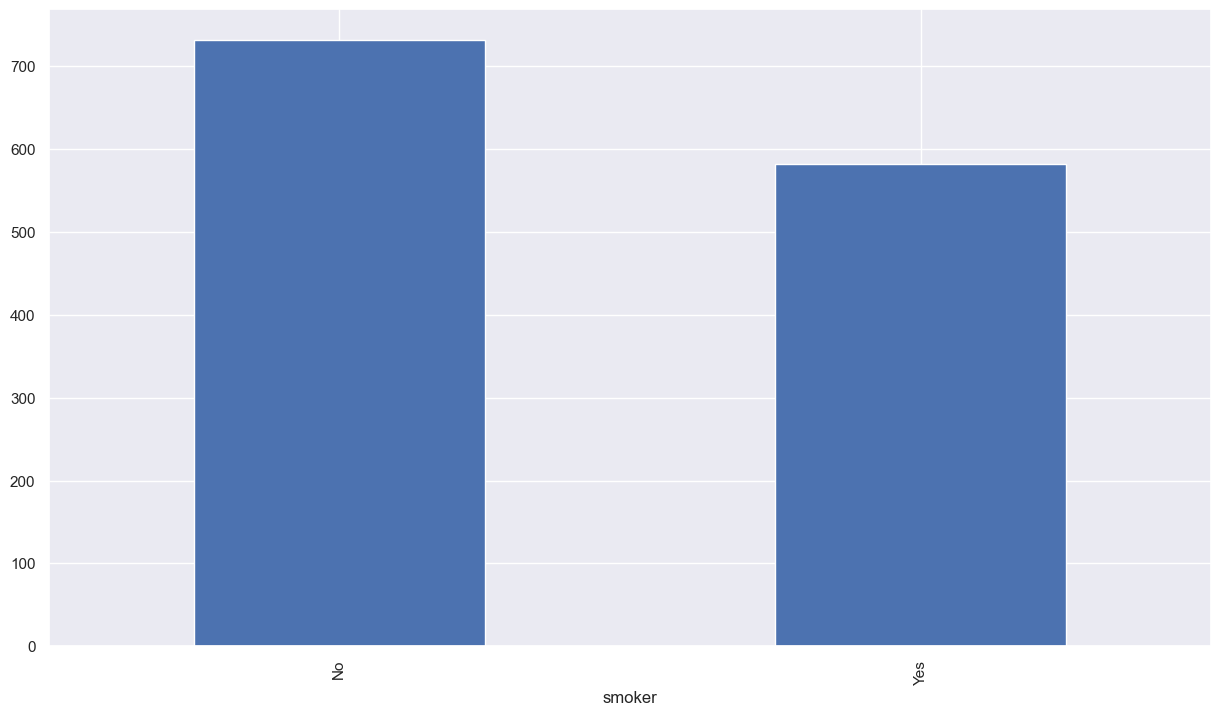

In [159]:
#outcome and smoker is the only numerical attribute
person_df.groupby('outcome').size().plot.bar()
plt.show()
person_df.groupby('smoker').size().plot.bar()

c. 

<AxesSubplot: xlabel='outcome', ylabel='smoker'>

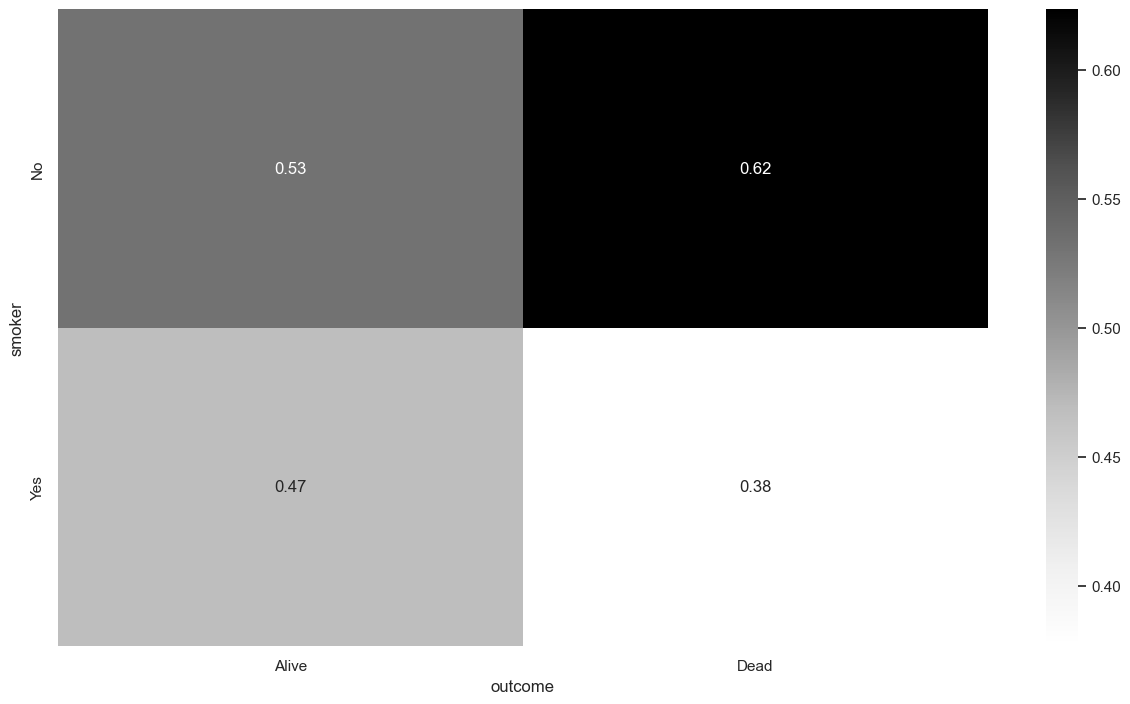

In [165]:
contingency_tbl = pd.crosstab(person_df.smoker, person_df.outcome)
probibility_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probibility_tbl, annot=True, center=0.5 ,cmap="Greys")

# the majority of dead aren't smokers. 


d. 

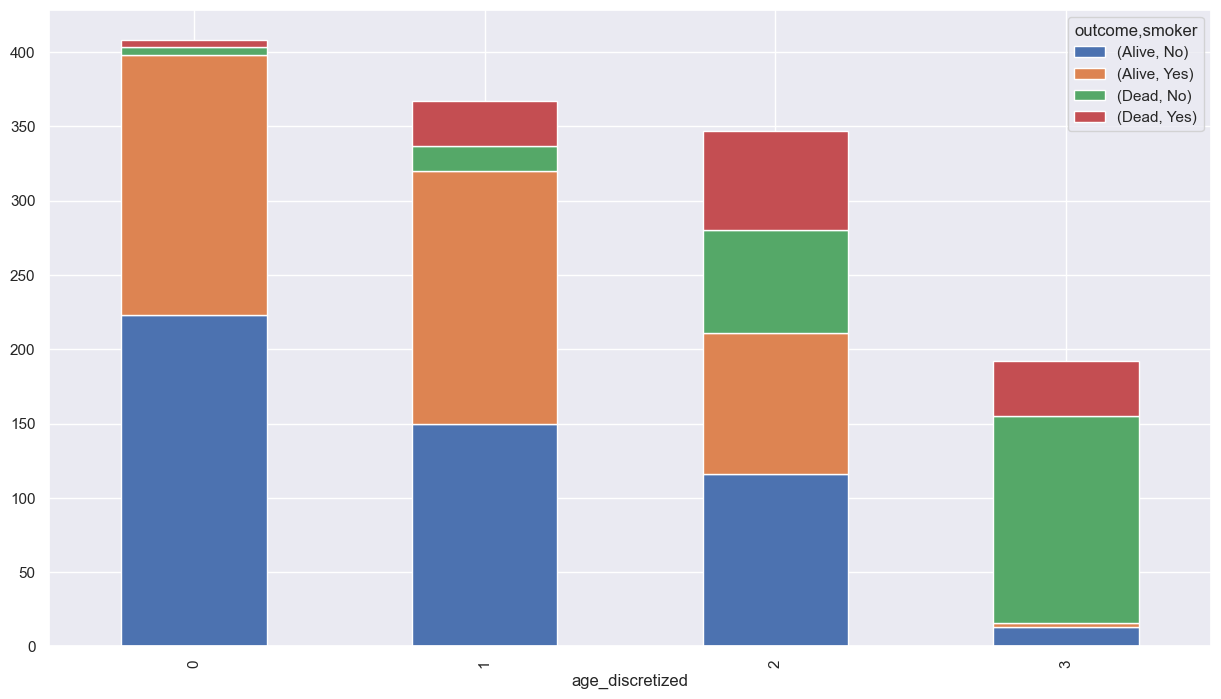

In [169]:
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()

#There is a distribution difference between age ranges.The number of alive smokers depletes significantly in the 4th bin. 
# There is also a change in the number of particiapants per age range. 
# The number of dead smokers definitly increase over time, but not as much as the number of alive smokers decreases. 
# Conclusion: ask you get older as a smoker, you likely either quit or die from the smoking. 

e.	Using the visual that was created under d) explain the surprising observation under c).

In [ ]:
# I'm going to guess that this answer has to do with the significant decrease in observations that are withinin the 4th age bin, the ones most likely to have died. 

f.	How many dimensions the visual that was created under d) has? How did we manage to add dimensions to the bar chart?


In [ ]:
# 5 dimensions in total. We added dimensions by coloring the bars porportionally to the percentage of thier outcome/smoker status. 

# Excercise 6

For this exercise, we will be using WH Report_preprocessed.csv. 

    a.	Use this dataset to create a 5-dimensional scatterplot to show the interactions between the following 5 attributes: year, Healthy_life_expectancy_at_birth, Social_support, Life_Ladder, population. 
    Use the control bar for the “year”, marker size for population, marker color for Social_support, x-axis for Healthy_life_expectancy_at_birth, and y-axis for Life_Ladder.
    b.	Interact with and study the visual you created under a) and report your observations. 



In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

country_df = pd.read_csv('WH Report_preprocessed.csv')
#print(country_df.head())

Social_support_poss = pd.cut(country_df.Social_support, bins = 7).unique()



colors_dic={'(0.498, 0.596]':'b', '(0.401, 0.498]':'g', '(0.694, 0.792]':'r', '(0.596, 0.694]':'c',
             '(0.792, 0.889]':'m', '(0.889, 0.987]':'y', '(0.302, 0.401]':'k'}
country_df.sort_values(['population'],inplace = True, ascending=False)


def plotyear(year):
    for interval in Social_support_poss:
        BM1 = (country_df.year == year)
        BM2 = (country_df.Social_support.between(interval.left,interval.right))

        BM = BM1 & BM2

        size = country_df[BM].population/200000
        X = country_df[BM].Healthy_life_expectancy_at_birth
        Y= country_df[BM].Life_Ladder
        plt.scatter(X,Y,c=colors_dic[str(interval)], marker='o', s=size,
                    linewidths=0.5,edgecolors='w',label=str(interval))
        
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Life_Ladder')
    plt.legend(markerscale=0.5)
    plt.show()

interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

a.

b. 

In [ ]:
# The relationship between HLEB and life ladder seems to get less and less pronounced as the years go on. 

# Excercise 7

For this exercise, we will continue using WH Report_preprocessed.csv. 

    a.	Create a visual that shows the trend of change for the attribute Generosity for all the countries in the dataset. To avoid making the visual overwhelming use the color grey for the line plots of all the countries, and don’t use a legend.
    b.	Add three more line plots to the previous visual using the color blue and a thicker line (linewidth=1.8) for the three countries, United States, China, and India. Work out the visual so it only shows you the legend of these three countries. The following screenshot shows the visual that is being described.



Figure 5. 23. Line plot comparing Generosity across all countries in 2010 and 2019 with emphasis on the United States, India, and China


    c.	Report your observations from the visual. Make sure to employ all of the line plots (grey and blue ones) in your observations 

a.

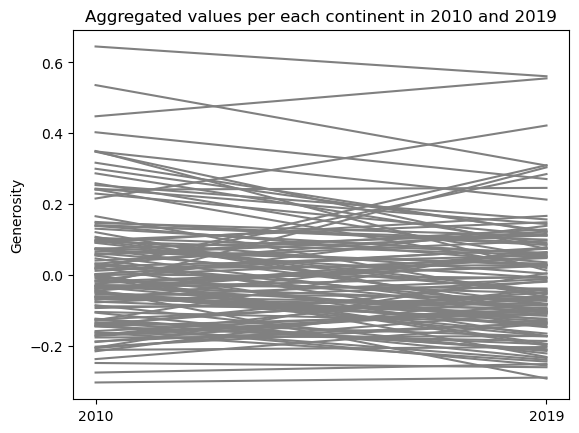

In [60]:

country_df = pd.read_csv('WH Report_preprocessed.csv')
continent_poss = country_df.Name.unique()
byContinentYear_df = country_df.groupby(['Name','year']).Generosity.mean()
Markers_options = ['^','o', 's']
m_flag = 0

for i,c in enumerate(continent_poss):
  plt.plot([2010,2019],byContinentYear_df.loc[c,[2010,2019]], color = 'grey')
plt.xticks([2010,2019])
#plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Aggregated values per each continent in 2010 and 2019')
plt.ylabel('Generosity')
plt.show()

b.

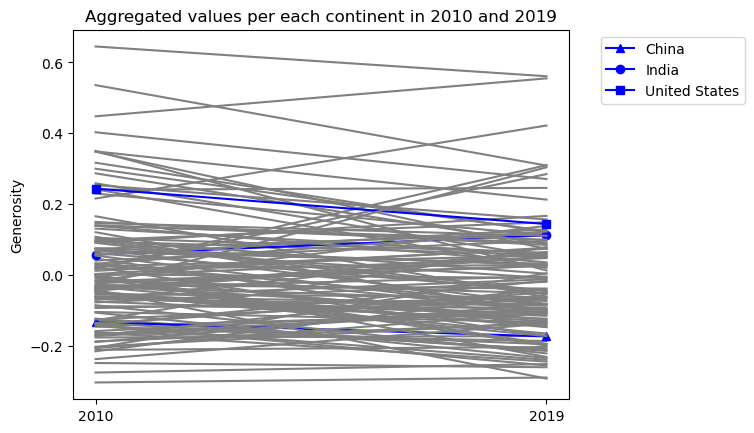

In [61]:

country_df = pd.read_csv('WH Report_preprocessed.csv')
continent_poss = country_df.Name.unique()
byContinentYear_df = country_df.groupby(['Name','year']).Generosity.mean()
Markers_options = ['^','o', 's']
m_flag = 0

for i,c in enumerate(continent_poss):
    # print(i)
    if c in ["United States", "China", "India"]:
        plt.plot([2010,2019],byContinentYear_df.loc[c,[2010,2019]], color = 'blue', marker = Markers_options[m_flag], label=c)
        m_flag += 1
    else:
        plt.plot([2010,2019],byContinentYear_df.loc[c,[2010,2019]], color = "grey")
plt.xticks([2010,2019])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Aggregated values per each continent in 2010 and 2019')
plt.ylabel('Generosity')
plt.show()

c.

In [ ]:
# Because the lines are blending into eachother, its hard to decern the aggregate slope of the lines. 
# In other words, its hard to tell a general trend in generoisty across the last decade. 
# A vast majoirty of these countries generoisty lie within .2 and -.2, including CHina, India and the United States,
# with the exception of the US in the early 2010s. 